#0. Data importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url="https://drive.google.com/file/d/1uknnBu30czwjuTiFOMx5hKozvf8HIZ6f/view?usp=sharing"
path='https://drive.google.com/uc?id='+url.split('/')[-2]
df=pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# 1-1. Basic Data Analysis

### General information
From the results below, there are no missing/null value in this dataset.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.shape

(200, 6)

### Drug

In [5]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

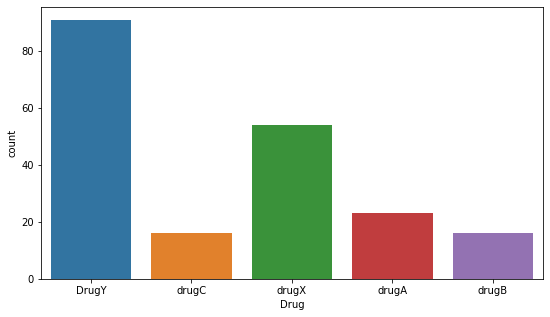

In [6]:
plt.figure(figsize = (9,5))
sns.countplot(x = df.Drug)
plt.show()

DrugY has more amount than other types of drugs.

### Sex

In [7]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

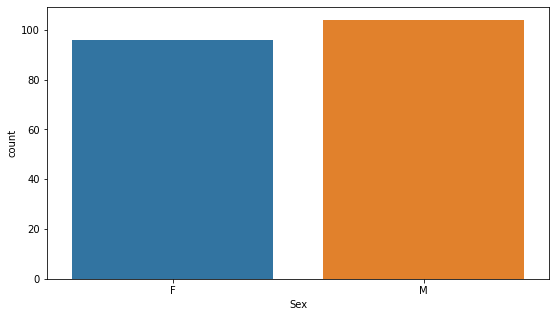

In [8]:
plt.figure(figsize = (9,5))
sns.countplot(x = df.Sex)
plt.show()

The distribution of patient gender is balanced.

### Blood Pressure

In [9]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

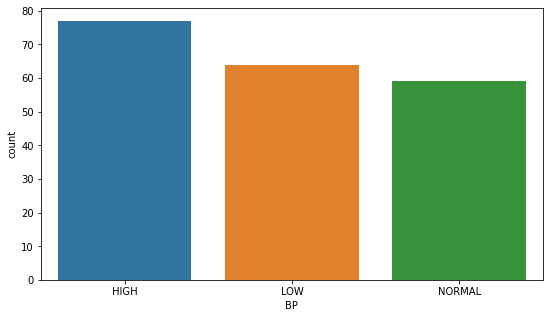

In [10]:
plt.figure(figsize = (9,5))
sns.countplot(x = df.BP)
plt.show()

The distribution of blood pressure level is balanced.

### Cholesterol

In [11]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

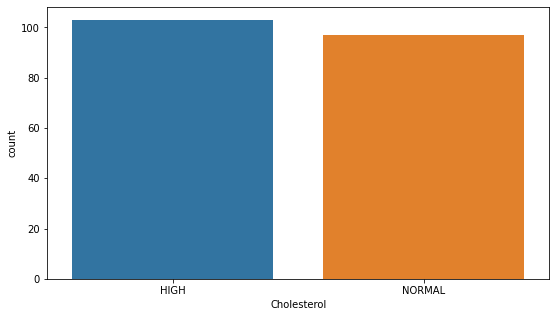

In [12]:
plt.figure(figsize = (9,5))
sns.countplot(x = df.Cholesterol)
plt.show()

The distribution of cholesterol level is balanced.

### Age

In [13]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


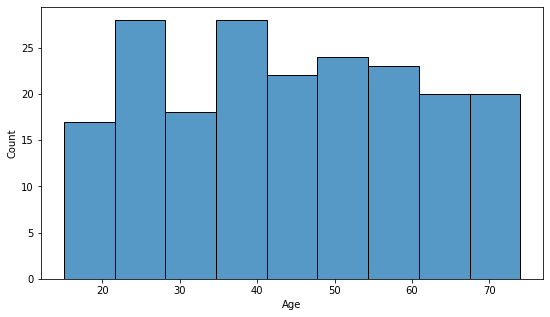

In [14]:
plt.figure(figsize = (9,5))
sns.histplot(x = df.Age)
plt.show()

### Sodium–potassium pump

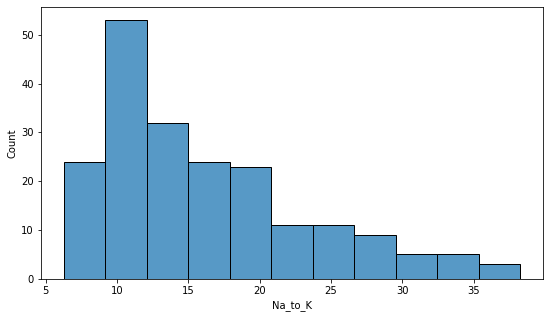

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.084485


In [15]:
plt.figure(figsize = (9,5))
sns.histplot(x = df.Na_to_K)
plt.show()

print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

# 1-2. Relation between an input variable and an output variable

### Age--Drug relation

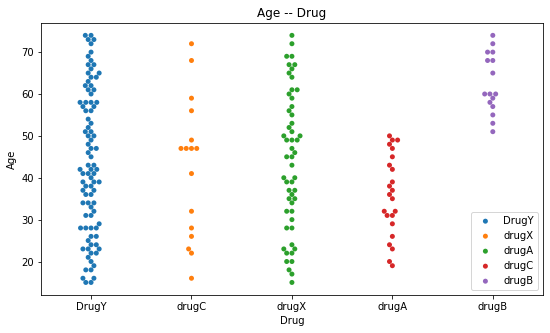

Minimum Age of DrugB 51
Maximum Age of DrugA 50


In [16]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

- DrugB is taken only by older than 51 years old. 
- DrugA is taken only by younger than 50 years old.

### Sex -- Drug relation

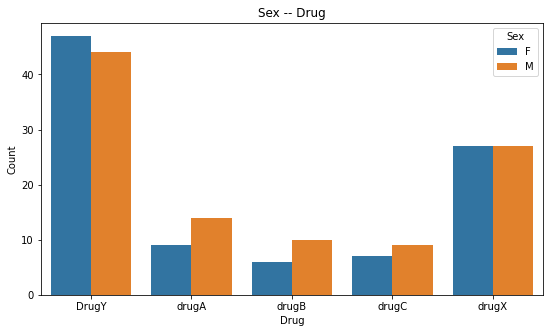

In [17]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

- Male people got drugA, drugB and drugC more than female people did.
- Female people got DrugY more than male people did.
- drugX seems equal for male and female.
- Sex feature is not an important feature for classification.

### BP -- Drug

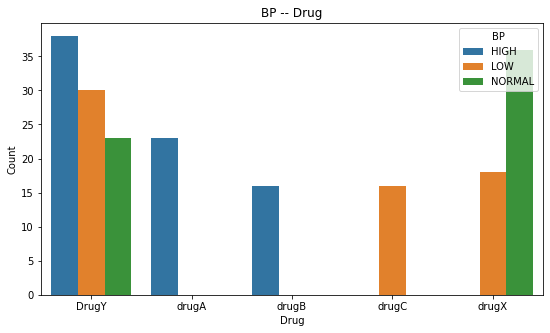

In [18]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

- drugA and drugB were given only to people with HIGH blood pressure.
- drugC was given to people with LOW blood pressure.
- drugX was Not given to people with HIGH blood pressure.
- BP is an important feature for classification.

### Na_to_K -- Drug

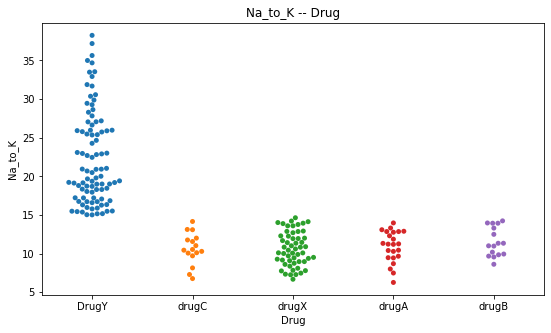

Minimum Na_to_K for DrugY: 15.015


In [19]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

- People with Na_to_K ratio bigger than 15, got DrugY.
- Na to K is an important feature for DrugY classification.

### Cholesterol -- Drug

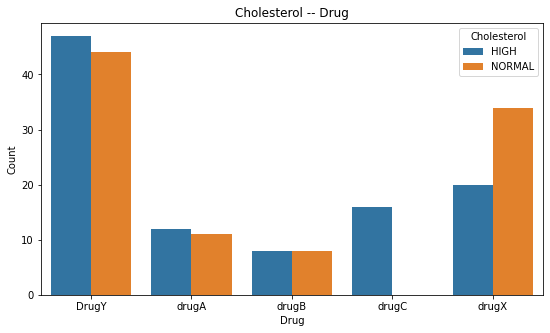

In [20]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

- drugC was only given to people with HIGH cholesterol.
- Cholesterol is an important feature to classify drugC.

# 2. Data Preparation

### 2-1. Age
The age will be divided into 7 age categories:
- Below 20 y.o.
- 20 - 29 y.o.
- 30 - 39 y.o.
- 40 - 49 y.o.
- 50 - 59 y.o.
- 60 - 69 y.o.
- Above 70.


In [21]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

### 2-2. Na_to_K
The chemical ratio will be divided into 4 categories:
- Below 10.
- 10 - 20.
- 20 - 30.
- Above 30.

In [22]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

# 3. Splitting the dataset
The dataset will be split into 70% training and 30% testing.

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 3-1. Feature Engineering
- one-hot encoding 
- transforming categorical variables

In [25]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


## 3-2. SMOTE Technique 
Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

In [26]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

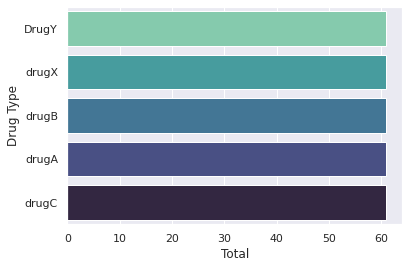

In [27]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

As can be seen, the distrubtion of drug type are now balanced.

#4. Model Training and Testing

* Training and Testing using Decision  Tree, Random Forest, SVM, and Naive Bayes
* Choose the model with the highest score


In [28]:
train_scores = {} # train score list
test_scores = {} # test score list

##4-1. Decision Tree classifier

In [29]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tr = tree.DecisionTreeClassifier(random_state = 0)

accuracies = cross_val_score(tr, X_train, y_train, cv=5)
tr.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",tr.score(X_test,y_test))

Train Score: 0.8721311475409836
Test Score: 0.75


In [30]:
train_scores["Decision Tree Train Score"] = np.mean(accuracies)
test_scores["Decision Tree Test Score"] = tr.score(X_test,y_test)

##4-2. Random Forest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

accuracies = cross_val_score(rf, X_train, y_train, cv=5)
rf.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rf.score(X_test,y_test))

Train Score: 0.8655737704918032
Test Score: 0.8333333333333334


In [32]:
train_scores["Random Forest Train Score"] = np.mean(accuracies)
test_scores["Random Forest Test Score"] = rf.score(X_test,y_test)

##4-3. SVM classifier

In [33]:
from sklearn.svm import SVC

svc = SVC(random_state = 0)

accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.35737704918032787
Test Score: 0.5


In [34]:
train_scores["SVM Train Score"] = np.mean(accuracies)
test_scores["SVM Test Score"] = svc.score(X_test,y_test)

##4-4. Naive Bayes classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

accuracies = cross_val_score(nb, X_train, y_train, cv=5)
nb.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",nb.score(X_test,y_test))

Train Score: 0.7672131147540984
Test Score: 0.7


In [36]:
train_scores["Naive Bayes Train Score"] = np.mean(accuracies)
test_scores["Naive Bayes Test Score"] = nb.score(X_test,y_test)

##4-5. Compare the scores

Compare the train scores

In [37]:
df_result_train = pd.DataFrame.from_dict(train_scores,orient = "index",columns=["Score"])
df_result_train

,Score
Decision Tree Train Score,0.872131
Random Forest Train Score,0.865574
SVM Train Score,0.357377
Naive Bayes Train Score,0.767213


Compare the test scores

In [38]:
df_result_test = pd.DataFrame.from_dict(test_scores,orient = "index",columns=["Score"])
df_result_test

,Score
Decision Tree Test Score,0.750000
Random Forest Test Score,0.833333
SVM Test Score,0.500000
Naive Bayes Test Score,0.700000


Graphical representation

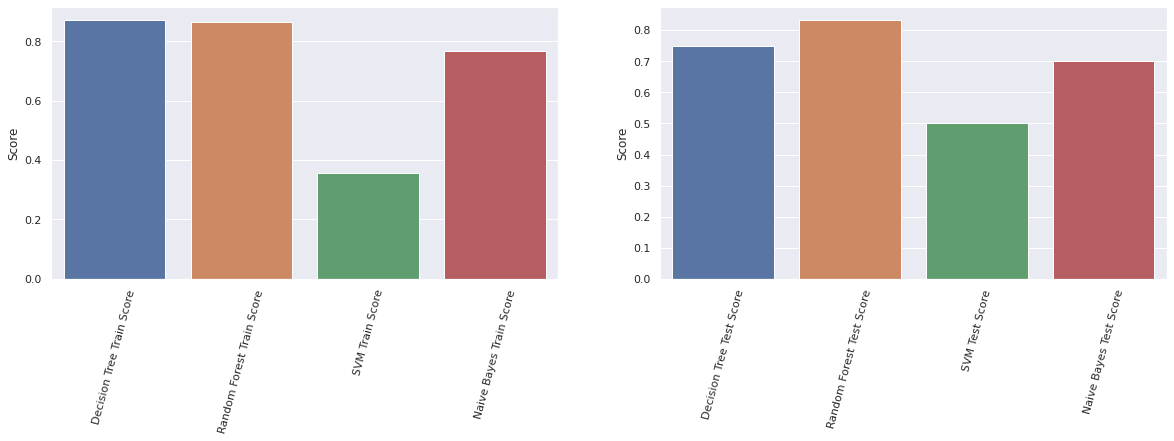

In [39]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

Select Random Forest classifier because it has the highest cross validation score.

#5. Report Model performance

Report the performance of Random Forest classifier using evaluation metrics

###5-1. Accuracy

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.8333333333333334


###5-2. confusion matrix

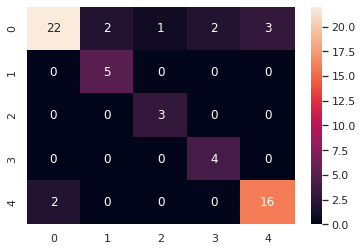

In [41]:
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)

###5-3. precision

In [42]:
prec = precision_score(y_test, y_pred, average='macro')
print("Precision: ", prec)

Precision:  0.7779448621553884


###5-4. Recall

In [43]:
rec = recall_score(y_test, y_pred, average='macro')
print("Recall: ", rec)

Recall:  0.9244444444444444


###5-5. F1-score

In [44]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score: ", f1)

F1 score:  0.8340311740311741


###5-6. ROC curves

AUC for Class 1: 0.8111111111111113
AUC for Class 2: 0.376984126984127
AUC for Class 3: 0.9883040935672516
AUC for Class 4: 0.28181818181818186
AUC for Class 5: 0.3214285714285714


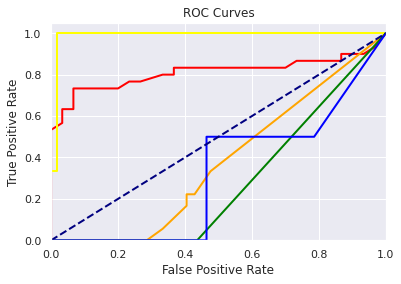

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve
from itertools import cycle

y_score = rf.predict_proba(X_test)
y_test_binary = label_binarize(y_test, classes=['DrugY', 'drugX', 'drugB', 'drugA', 'drugC'])
n_classes = y_test_binary.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

colors = cycle(['red', 'orange', 'yellow', 'green', 'blue'])

for i, color in zip(range(n_classes), colors):
  fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=color, lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.show()

###5-7. PR curves

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binary[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_binary.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test_binary, y_score, average="micro")

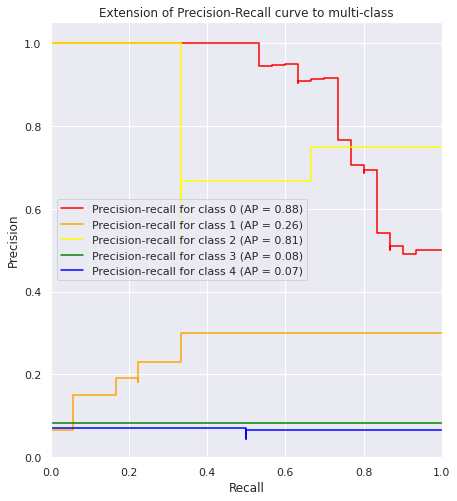

In [47]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(7, 8))

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)


handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

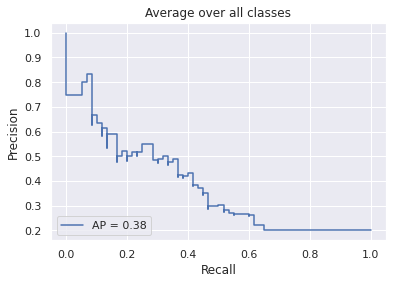

In [48]:
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Average over all classes")

#6. Feature Ranking

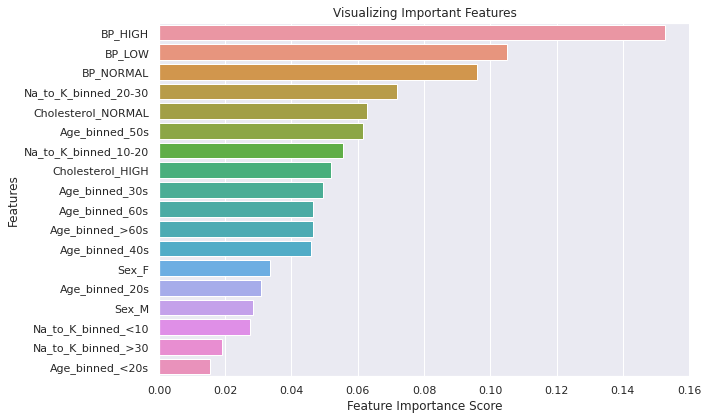

In [49]:
import matplotlib.pyplot as plt

feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

The BP_HIGH is the most important feature. Also, the second one and the third one is related to blood pressure. Therefore, the blood pressure is the most influential parameter that affects the type of drugs.

#7. Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[50, 80, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_features' : [4, 5, 6],
    'max_depth' : [3, 5, 8, 10],
    'min_samples_split' : [8, 16, 20]
}


In [51]:
rf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf2, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10], 'max_features': [4, 5, 6],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [50, 80, 100, 200]})

In [52]:
print('Best Parameters: ', grid_cv.best_params_)
print('Best Accuracy: ', grid_cv.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 80}
Best Accuracy:  0.9114735002912057


In [53]:
# Random forest model training again with optimal parameters obtained through GridSearchCV
new_rf = RandomForestClassifier(criterion = 'entropy',
                                max_depth = 10,
                                max_features = 4,
                                min_samples_split = 8,
                                n_estimators = 50,
                                random_state = 1,
                                n_jobs = -1)

new_rf.fit(X_train, y_train)

new_accuracies = cross_val_score(new_rf, X_train, y_train, cv=5)
print("Train Score:",np.mean(new_accuracies))
print("Test Score:",new_rf.score(X_test,y_test))

Train Score: 0.9049180327868852
Test Score: 0.85


The accuary of model with best parameters is about 0.902. The initial accuaracy of random forest model is about 0.879. Therefore, after hyperparameter tuning, we can get the better model.

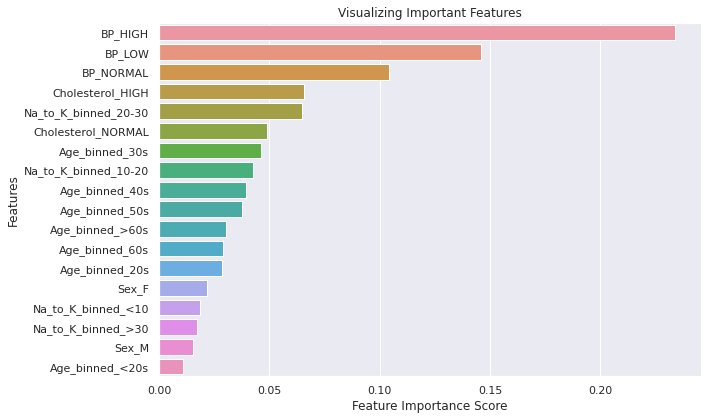

In [54]:
feature_imp = pd.Series(new_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

After hyperparamter tuning, Na_to_K_binned_20-30 got more importance. But overall, Blood Pressure is still the most important feature.

# 8. Report Model Performance Again

Report the performance of Random Forest classifier, which has best hyperparameters after hyperparameter tuning, using evaluation metrics

### 8-1. Accuracy

In [55]:
 #Show our model's accuracy by accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

y_pred = new_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.85


 ### 8-2. Confusion Matrix

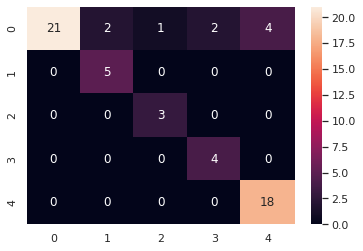

In [56]:
 #Confusion Matrix
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)

### 8-3. Precision

In [57]:
 #precision evaluation
 #precision = TP / (TP + FP)

prec = precision_score(y_test, y_pred, average='macro')
print("Precision: ", prec)

Precision:  0.7898268398268399


### 8-4. Recall

In [58]:
 #recall evaluation
 #recall = TP / P

rec = recall_score(y_test, y_pred, average='macro')
print("Recall: ", rec)

Recall:  0.9400000000000001


### 8-5. F1-Score

In [59]:
 #F1_score evaluation
 # F1 = 2 * Precisoin * Recall / (Precision + Recall)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score: ", f1)

F1 score:  0.8428011204481793


### 8-6. ROC Curves

AUC for Class 1: 0.7933333333333334
AUC for Class 2: 0.38624338624338617
AUC for Class 3: 0.9883040935672515
AUC for Class 4: 0.2363636363636364
AUC for Class 5: 0.28348214285714285


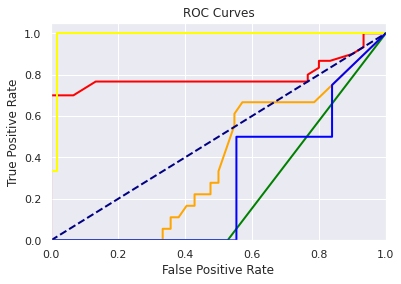

In [60]:
 #Receiver Operating Characteristic Curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, f1_score
from itertools import cycle

y_score = new_rf.predict_proba(X_test)
y_test_binary = label_binarize(y_test, classes=['DrugY', 'drugX', 'drugB', 'drugA', 'drugC'])
n_classes = y_test_binary.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

colors = cycle(['red', 'orange', 'yellow', 'green', 'blue'])

for i, color in zip(range(n_classes), colors):
  fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=color, lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.show()

### 8-7. PR Curves

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binary[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_binary.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test_binary, y_score, average="micro")

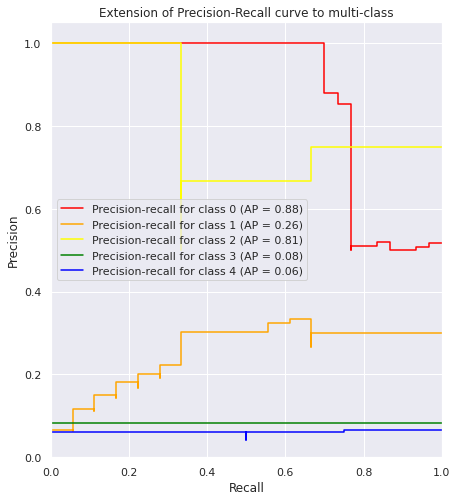

In [62]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(7, 8))

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)


handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

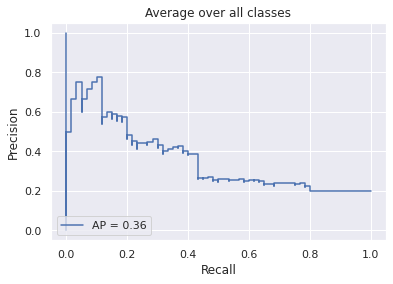

In [63]:
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Average over all classes")

# 9. Predicting New Data

We wil check if our new model prescribes to new patient properly

In [64]:
# setting new patient's feature list
# Looking at the dataset, if Na_to_K is higger than 15, it is classified as drugY. So set new patien's Na_to_K_binned_>30 feature to 1
# We wil check if our new model prescribes drugY to new patient properly

new_patient = [[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]

In [65]:
# prediction on new patient

new_patient_pred = new_rf.predict(new_patient)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
# print predict result

new_patient_pred

array(['DrugY'], dtype=object)

As predicted, drugY is prescribed to the new patient.
This shows that our new model presribed well enough to new patients.

# 10. Result Interpretation

## 10-1. Correlation between features and the type of drug predicted by the model

In [67]:
pred_rf = new_rf.predict(X_test)
prediction = pd.DataFrame({'Sex_F': X_test.loc[:,"Sex_F"], 
                           'Sex_M': X_test.loc[:,"Sex_M"], 
                           'BP_HIGH': X_test.loc[:,"BP_HIGH"], 
                           'BP_LOW': X_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': X_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': X_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': X_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': X_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': X_test.loc[:,"Age_binned_20s"],
                           'Age_binned_30s': X_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': X_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': X_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': X_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>60s': X_test.loc[:,"Age_binned_>60s"],
                           'Na_to_K_binned_<10': X_test.loc[:,"Na_to_K_binned_<10"],
                           'Na_to_K_binned_10-20': X_test.loc[:,"Na_to_K_binned_10-20"],
                           'Na_to_K_binned_20-30': X_test.loc[:,"Na_to_K_binned_20-30"],
                           'Na_to_K_binned_>30': X_test.loc[:,"Na_to_K_binned_>30"],'DrugType': pred_rf})

In [68]:
# Sex
prediction['Sex_F'] = prediction['Sex_F'].replace([1, 0],['Female', 'Male'])

#BP
prediction['BP_HIGH'] = prediction['BP_HIGH'].replace([1, 0],['High',''])
prediction['BP_LOW'] = prediction['BP_LOW'].replace([1, 0],['Low', ''])
prediction['BP_NORMAL'] = prediction['BP_NORMAL'].replace([1, 0],['Normal', ''])

prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_LOW'], prediction['BP_HIGH'])
prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_NORMAL'], prediction['BP_HIGH'])

#Cholestrol
prediction['Cholesterol_HIGH'] = prediction['Cholesterol_HIGH'].replace([1, 0],['High', 'Normal'])

#Age_binned
prediction['Age_binned_<20s'] = prediction['Age_binned_<20s'].replace([1, 0],['<20s',''])
prediction['Age_binned_20s'] = prediction['Age_binned_20s'].replace([1, 0],['20s',''])
prediction['Age_binned_30s'] = prediction['Age_binned_30s'].replace([1, 0],['30s',''])
prediction['Age_binned_40s'] = prediction['Age_binned_40s'].replace([1, 0],['40s',''])
prediction['Age_binned_50s'] = prediction['Age_binned_50s'].replace([1, 0],['50s',''])
prediction['Age_binned_60s'] = prediction['Age_binned_60s'].replace([1, 0],['60s',''])
prediction['Age_binned_>60s'] = prediction['Age_binned_>60s'].replace([1, 0],['>60s',''])

prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_20s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_30s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_40s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_50s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_60s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_>60s'], prediction['Age_binned_<20s'])

#Na to K
prediction['Na_to_K_binned_<10'] = prediction['Na_to_K_binned_<10'].replace([1, 0],['<10',''])
prediction['Na_to_K_binned_10-20'] = prediction['Na_to_K_binned_10-20'].replace([1, 0],['10-20',''])
prediction['Na_to_K_binned_20-30'] = prediction['Na_to_K_binned_20-30'].replace([1, 0],['20-30',''])
prediction['Na_to_K_binned_>30'] = prediction['Na_to_K_binned_>30'].replace([1, 0],['>30s',''])

prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_10-20'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_20-30'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_>30'], prediction['Na_to_K_binned_<10'])

# Drop columns
prediction = prediction.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)

In [69]:
# Rename columns name
new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
prediction.rename(columns=new_name, inplace=True)

In [70]:
prediction

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned,DrugType
18,Male,Low,High,20s,<10,drugC
170,Female,Normal,High,20s,10-20,drugX
107,Male,Low,High,40s,20-30,DrugY
98,Male,High,Normal,20s,>30s,DrugY
177,Male,Normal,High,20s,20-30,DrugY
182,Female,Low,Normal,20s,10-20,drugX
5,Female,Normal,High,20s,<10,drugX
146,Female,Low,Normal,30s,10-20,drugX
12,Male,Low,High,40s,10-20,drugC
152,Male,Normal,Normal,50s,<10,drugX


### **Age -- Drug** relation

In [71]:
ad_pred = new_rf.predict(X_test)
ad_pred = pd.DataFrame({'Sex_F': X_test.loc[:,"Sex_F"], 
                           'Sex_M': X_test.loc[:,"Sex_M"], 
                           'BP_HIGH': X_test.loc[:,"BP_HIGH"], 
                           'BP_LOW': X_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': X_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': X_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': X_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': X_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': X_test.loc[:,"Age_binned_20s"],
                           'Age_binned_30s': X_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': X_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': X_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': X_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>60s': X_test.loc[:,"Age_binned_>60s"],
                           'Na_to_K_binned_<10': X_test.loc[:,"Na_to_K_binned_<10"],
                           'Na_to_K_binned_10-20': X_test.loc[:,"Na_to_K_binned_10-20"],
                           'Na_to_K_binned_20-30': X_test.loc[:,"Na_to_K_binned_20-30"],
                           'Na_to_K_binned_>30': X_test.loc[:,"Na_to_K_binned_>30"],'DrugType': pred_rf})

ad_pred['Age_binned_<20s'] = ad_pred['Age_binned_<20s'].replace([1, 0],[10,''])
ad_pred['Age_binned_20s'] = ad_pred['Age_binned_20s'].replace([1, 0],[20,''])
ad_pred['Age_binned_30s'] = ad_pred['Age_binned_30s'].replace([1, 0],[30,''])
ad_pred['Age_binned_40s'] = ad_pred['Age_binned_40s'].replace([1, 0],[40,''])
ad_pred['Age_binned_50s'] = ad_pred['Age_binned_50s'].replace([1, 0],[50,''])
ad_pred['Age_binned_60s'] = ad_pred['Age_binned_60s'].replace([1, 0],[60,''])
ad_pred['Age_binned_>60s'] = ad_pred['Age_binned_>60s'].replace([1, 0],[70,''])

ad_pred['Age_binned_<20s'] = np.where((ad_pred['Age_binned_<20s'] == ''), ad_pred['Age_binned_20s'], ad_pred['Age_binned_<20s'])
ad_pred['Age_binned_<20s'] = np.where((ad_pred['Age_binned_<20s'] == ''), ad_pred['Age_binned_30s'], ad_pred['Age_binned_<20s'])
ad_pred['Age_binned_<20s'] = np.where((ad_pred['Age_binned_<20s'] == ''), ad_pred['Age_binned_40s'], ad_pred['Age_binned_<20s'])
ad_pred['Age_binned_<20s'] = np.where((ad_pred['Age_binned_<20s'] == ''), ad_pred['Age_binned_50s'], ad_pred['Age_binned_<20s'])
ad_pred['Age_binned_<20s'] = np.where((ad_pred['Age_binned_<20s'] == ''), ad_pred['Age_binned_60s'], ad_pred['Age_binned_<20s'])
ad_pred['Age_binned_<20s'] = np.where((ad_pred['Age_binned_<20s'] == ''), ad_pred['Age_binned_>60s'], ad_pred['Age_binned_<20s'])

ad_pred = ad_pred.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)

ad_new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
ad_pred.rename(columns=ad_new_name, inplace=True)

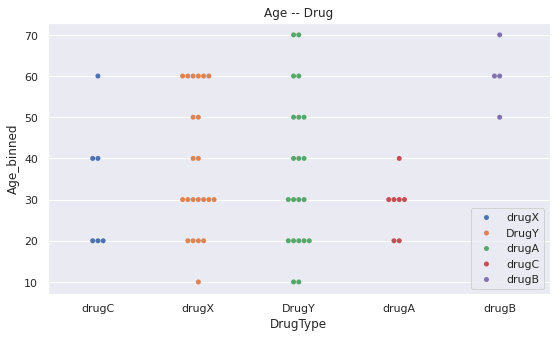

[drugC] min age: 20 , max age: 60
[drugX] min age: 10 , max age: 60
[DrugY] min age: 10 , max age: 70
[drugA] min age: 20 , max age: 40
[drugB] min age: 50 , max age: 70


In [72]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "DrugType", y = "Age_binned",data = ad_pred)
plt.legend(ad_pred.DrugType.value_counts().index)
plt.title("Age -- Drug")
plt.show()

print("[drugC] min age:", ad_pred.Age_binned[ad_pred.DrugType == "drugC"].min(), ", max age:", ad_pred.Age_binned[ad_pred.DrugType == "drugC"].max())
print("[drugX] min age:", ad_pred.Age_binned[ad_pred.DrugType == "drugX"].min(), ", max age:", ad_pred.Age_binned[ad_pred.DrugType == "drugX"].max())
print("[DrugY] min age:", ad_pred.Age_binned[ad_pred.DrugType == "DrugY"].min(), ", max age:", ad_pred.Age_binned[ad_pred.DrugType == "DrugY"].max())
print("[drugA] min age:", ad_pred.Age_binned[ad_pred.DrugType == "drugA"].min(), ", max age:", ad_pred.Age_binned[ad_pred.DrugType == "drugA"].max())
print("[drugB] min age:", ad_pred.Age_binned[ad_pred.DrugType == "drugB"].min(), ", max age:", ad_pred.Age_binned[ad_pred.DrugType == "drugB"].max())

- drugC and drugA are not taken by the children and teenager, whose ages are between 0 and 19.
- drugA is taken only by the younger than 50 years old.
- drugB is taken only by the older than 50 years old.
- DrugY is taken by all ages.

### **Sex -- Drug** relation

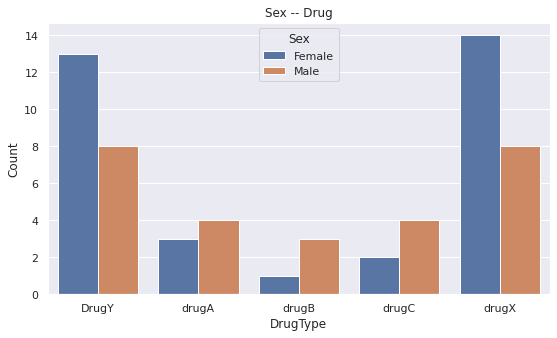

In [73]:
pred_Sex_Drug = prediction.groupby(["DrugType","Sex"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "DrugType",y="Count", hue = "Sex",data = pred_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

- Male people got drugA, drugB and drugC more than female people did.
- Female people got DrugY and drugX more than male people did.
- Just by this, 'sex' becomes quite appropriate feature for classification compared to beginning.

### **BP -- Drug** relation

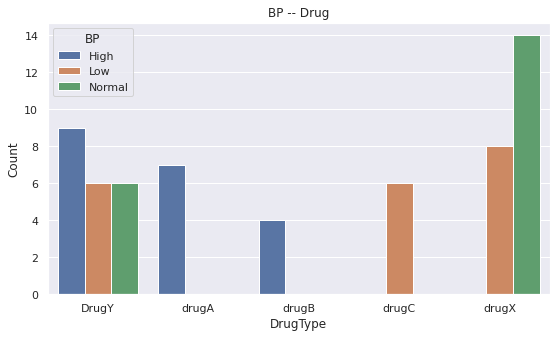

In [74]:
pred_BP_Drug = prediction.groupby(["DrugType","BP"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "DrugType",y="Count", hue = "BP",data = pred_BP_Drug)
plt.title("BP -- Drug")
plt.show()

- drugA and drugB were given only to people with HIGH blood pressure.
- drugC was given to people with LOW blood pressure.
- drugX was Not given to people with HIGH blood pressure.
- Still, BP is an important feature for classification.

### **Na_to_K -- Drug** relation

In [75]:
ntk_pred = new_rf.predict(X_test)
ntk_pred = pd.DataFrame({'Sex_F': X_test.loc[:,"Sex_F"], 
                           'Sex_M': X_test.loc[:,"Sex_M"], 
                           'BP_HIGH': X_test.loc[:,"BP_HIGH"], 
                           'BP_LOW': X_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': X_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': X_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': X_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': X_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': X_test.loc[:,"Age_binned_20s"],
                           'Age_binned_30s': X_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': X_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': X_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': X_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>60s': X_test.loc[:,"Age_binned_>60s"],
                           'Na_to_K_binned_<10': X_test.loc[:,"Na_to_K_binned_<10"],
                           'Na_to_K_binned_10-20': X_test.loc[:,"Na_to_K_binned_10-20"],
                           'Na_to_K_binned_20-30': X_test.loc[:,"Na_to_K_binned_20-30"],
                           'Na_to_K_binned_>30': X_test.loc[:,"Na_to_K_binned_>30"],'DrugType': pred_rf})

ntk_pred['Na_to_K_binned_<10'] = ntk_pred['Na_to_K_binned_<10'].replace([1, 0],['0-10',''])
ntk_pred['Na_to_K_binned_10-20'] = ntk_pred['Na_to_K_binned_10-20'].replace([1, 0],['10-20',''])
ntk_pred['Na_to_K_binned_20-30'] = ntk_pred['Na_to_K_binned_20-30'].replace([1, 0],['20-30',''])
ntk_pred['Na_to_K_binned_>30'] = ntk_pred['Na_to_K_binned_>30'].replace([1, 0],['30-',''])

ntk_pred['Na_to_K_binned_<10'] = np.where((ntk_pred['Na_to_K_binned_<10'] == ''), ntk_pred['Na_to_K_binned_10-20'], ntk_pred['Na_to_K_binned_<10'])
ntk_pred['Na_to_K_binned_<10'] = np.where((ntk_pred['Na_to_K_binned_<10'] == ''), ntk_pred['Na_to_K_binned_20-30'], ntk_pred['Na_to_K_binned_<10'])
ntk_pred['Na_to_K_binned_<10'] = np.where((ntk_pred['Na_to_K_binned_<10'] == ''), ntk_pred['Na_to_K_binned_>30'], ntk_pred['Na_to_K_binned_<10'])

ntk_pred = ntk_pred.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)

ntk_new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
ntk_pred.rename(columns=ntk_new_name, inplace=True)

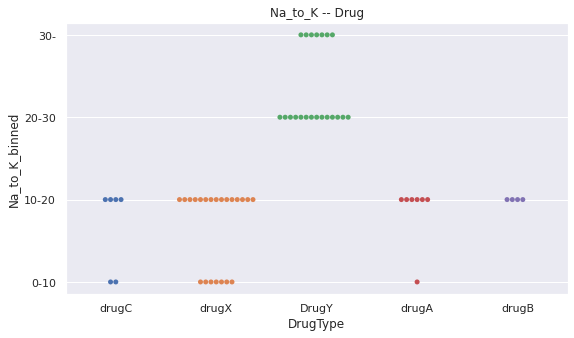

[drugC] min Na_to_K: 0-10 , max Na_to_K: 0-10
[drugX] min Na_to_K: 0-10 , max Na_to_K: 0-10
[DrugY] min Na_to_K: 20-30 , max Na_to_K: 20-30
[drugA] min Na_to_K: 0-10 , max Na_to_K: 0-10
[drugB] min Na_to_K: 10-20 , max Na_to_K: 10-20


In [76]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "DrugType", y = "Na_to_K_binned",data = ntk_pred)
plt.title("Na_to_K -- Drug")
plt.show()

print("[drugC] min Na_to_K:",ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugC"].min(), ", max Na_to_K:", ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugC"].min())
print("[drugX] min Na_to_K:",ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugX"].min(), ", max Na_to_K:", ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugX"].min())
print("[DrugY] min Na_to_K:",ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "DrugY"].min(), ", max Na_to_K:", ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "DrugY"].min())
print("[drugA] min Na_to_K:",ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugA"].min(), ", max Na_to_K:", ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugA"].min())
print("[drugB] min Na_to_K:",ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugB"].min(), ", max Na_to_K:", ntk_pred.Na_to_K_binned[ntk_pred.DrugType == "drugB"].min())

- People with Na_to_K ratio bigger than 20, got DrugY.
- Still, Na to K is an important feature for DrugY classification.

### **Cholesterol -- Drug** relation

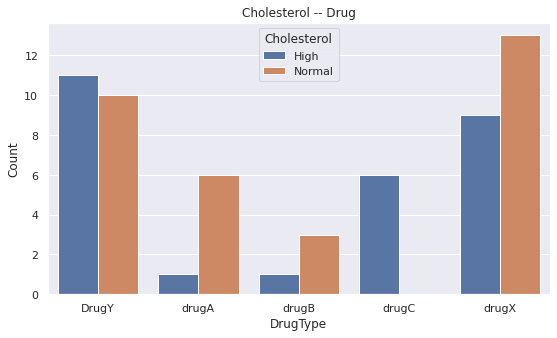

In [77]:
pred_CH_Drug = prediction.groupby(["DrugType","Cholesterol"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "DrugType",y="Count", hue = "Cholesterol",data = pred_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

- drugC was only given to people with HIGH cholesterol.
- Cholesterol is an important feature to classify drugC.
- Compared to the beginning, drugA and drugB is almost given to the people who have Normal cholesterol.
- Therefore, drugA and drugB become an important feature to classify drugA and drugB.

## 10-2. Cause of misclassification

In [78]:
# using tuned hyperparameters
new_y_pred = new_rf.predict(X_test)
misclassified = (y_test == new_y_pred)
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted' : new_y_pred, 'Correct?': misclassified})
cross_check

,Actual,Predicted,Correct?
18,drugC,drugC,True
170,drugX,drugX,True
107,DrugY,DrugY,True
98,DrugY,DrugY,True
177,DrugY,DrugY,True
182,drugX,drugX,True
5,drugX,drugX,True
146,drugX,drugX,True
12,DrugY,drugC,False
152,drugX,drugX,True


In [79]:
temp = np.where(misclassified == False)
temp = np.array(temp).reshape((-1,)).tolist()
misclassified.take(temp)

12     False
154    False
74     False
183    False
123    False
179    False
4      False
8      False
143    False
Name: Drug, dtype: bool

In [80]:
misclassified_idx = misclassified.take(temp).index.tolist()
misclassified_idx = sorted(misclassified_idx)
reval = pd.DataFrame()
for i in misclassified_idx:
  reval = reval.append([df.iloc[i]])
reval

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
4,F,LOW,HIGH,DrugY,60s,10-20
8,M,NORMAL,HIGH,DrugY,60s,10-20
12,M,LOW,HIGH,DrugY,40s,10-20
74,M,HIGH,NORMAL,DrugY,30s,10-20
123,F,NORMAL,HIGH,DrugY,30s,10-20
143,M,HIGH,NORMAL,DrugY,>60s,10-20
154,M,LOW,NORMAL,DrugY,30s,10-20
179,F,NORMAL,HIGH,DrugY,60s,10-20
183,F,HIGH,NORMAL,DrugY,30s,10-20


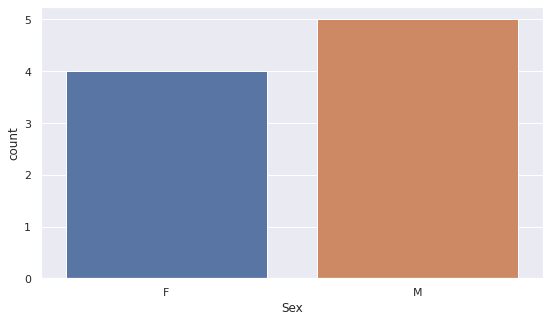

In [81]:
plt.figure(figsize = (9,5))
sns.countplot(x = reval.Sex)
plt.show()

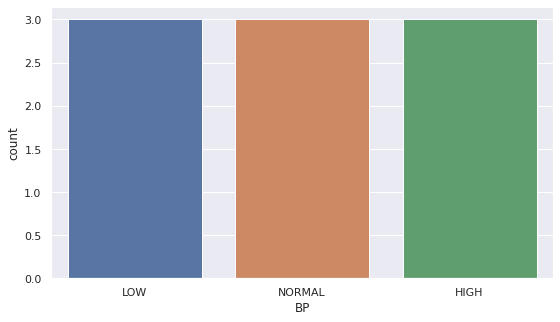

In [82]:
plt.figure(figsize = (9,5))
sns.countplot(x = reval.BP)
plt.show()

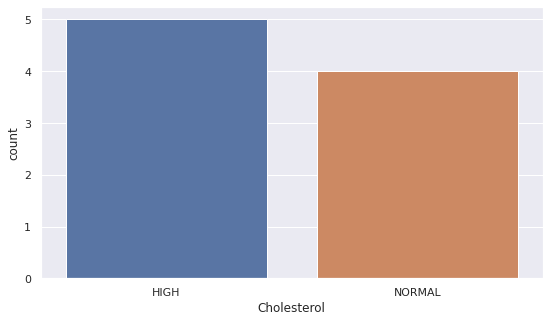

In [83]:
plt.figure(figsize = (9,5))
sns.countplot(x = reval.Cholesterol)
plt.show()

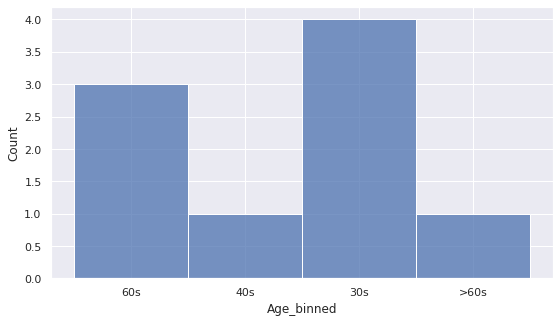

In [84]:
plt.figure(figsize = (9,5))
sns.histplot(x = reval.Age_binned)
plt.show()

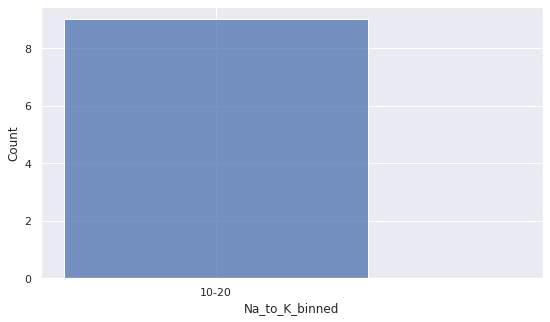

In [85]:
plt.figure(figsize = (9,5))
sns.histplot(x = reval.Na_to_K_binned)
plt.show()

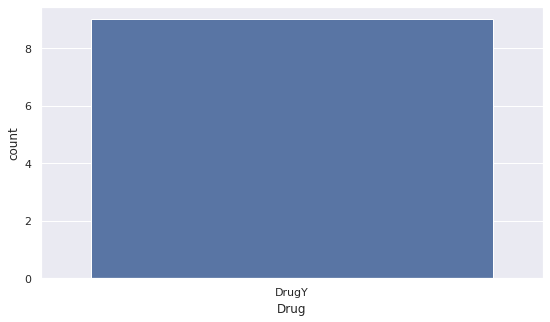

In [86]:
plt.figure(figsize = (9,5))
sns.countplot(x = reval.Drug)
plt.show()


There was no significant difference between the misclassified data, and the predicted result values did not show any obvious tendencies.<br />
One notable point was that Na_to_K 10-20 took a substantial proportion. This seems to be due to the ambiguity that can be classified into all drug types if they belong to this group.
Also, people who should have been prescribed DrugY were likely to be misclassified, which is suspected to be due to the universal range of data.<br />
Therefore, the cause of the misclassified data is thought to be the ambiguity of classifying boundary values.